In [1]:
from elasticsearch import Elasticsearch
from plot import plot_data, merge_bom_epa, create_heatmap, plot_air_quality_and_sentiment
import ipywidgets as widgets
from IPython.display import display, clear_output
from get_data import twitter, epa, bom, health
import pandas as pd

In [2]:
es = Elasticsearch(
    'https://127.0.0.1:9200',
    verify_certs=False,
    basic_auth=('elastic', 'elastic'),
    request_timeout=60,
    ssl_show_warn=False
    )

Text(value='Ballarat', description='City:')

Button(description='Update Plot', style=ButtonStyle())

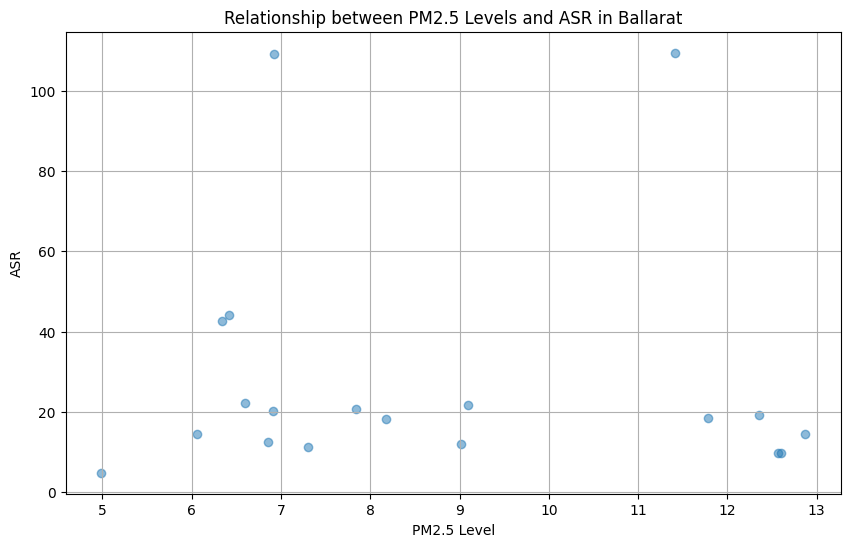

In [10]:
city = None

city_textbox = widgets.Text(
    value='Melbourne',
    description='City:',
    disabled=False
)

button = widgets.Button(description="Update Plot")

def on_button_clicked(b):
    global city  
    city = city_textbox.value  
    clear_output(wait=True)  
    display(city_textbox, button)  
    plot_data(es, start=1, end=10, city=city, size=1000)  

button.on_click(on_button_clicked)

display(city_textbox, button)

In [11]:
epa_data = epa(es, start=3, end=10, size=2000)
bom_data = bom(es, start=3, end=10, size=2000)

In [ ]:
print(epa_data)
print(bom_data)

In [12]:
data_epa = [{**item['_source'], 'date': item['_index']} for item in epa_data]
# data_epa = [item['_source'] for item in epa_data]
epa_df = pd.DataFrame(data_epa)
print(epa_df)

          hour         siteName                coordinates  averageValue  \
0     01:00:00         Box Hill    [-37.8287277, 145.1324]      9.180000   
1     01:00:00       Alphington    [-37.7784081, 145.0306]      9.790000   
2     01:00:00        Churchill  [-38.3043137, 146.414932]      2.500000   
3     01:00:00  Traralgon South      [-38.29585, 146.5392]      5.470000   
4     01:00:00        Traralgon  [-38.1942825, 146.531464]      1.610000   
...        ...              ...                        ...           ...   
1995  23:00:00          Kyneton    [-37.24706, 144.451111]      8.344532   
1996  23:00:00        Heathcote    [-36.92107, 144.709946]      8.344532   
1997  23:00:00         Kinglake  [-37.5337448, 145.340515]      8.344532   
1998  23:00:00       Daylesford  [-37.3410339, 144.130463]      9.480000   
1999  23:00:00          Heywood  [-38.1323051, 141.631821]      8.368691   

     healthParameter healthAdvice                        date  
0              PM2.5   

In [13]:
data_bom = [item['_source'] for item in bom_data]
bom_df = pd.DataFrame(data_bom)
print(bom_df)

                    site_name local_date_time     coordinates  \
0    Melbourne (Olympic Park)  20240503153000  [-37.8, 145.0]   
1           Melbourne Airport  20240503153000  [-37.7, 144.8]   
2    Melbourne (Olympic Park)  20240503160000  [-37.8, 145.0]   
3           Melbourne Airport  20240503160000  [-37.7, 144.8]   
4    Melbourne (Olympic Park)  20240503170000  [-37.8, 145.0]   
..                        ...             ...             ...   
349         Melbourne Airport  20240510210000  [-37.7, 144.8]   
350  Melbourne (Olympic Park)  20240510220000  [-37.8, 145.0]   
351         Melbourne Airport  20240510220000  [-37.7, 144.8]   
352  Melbourne (Olympic Park)  20240510230000  [-37.8, 145.0]   
353         Melbourne Airport  20240510230000  [-37.7, 144.8]   

     apparent_temperature          cloud cloud_type  delta_temperature  \
0                    15.8              -          -                3.0   
1                    14.0          Clear          -                4.4 

In [14]:
merged_df = merge_bom_epa(bom_df=bom_df, epa_df=epa_df)
print(merged_df)

                     site_name     local_date_time coordinates_bom  \
0     Melbourne (Olympic Park) 2024-05-03 15:30:00  [-37.8, 145.0]   
1     Melbourne (Olympic Park) 2024-05-03 15:30:00  [-37.8, 145.0]   
2     Melbourne (Olympic Park) 2024-05-03 15:30:00  [-37.8, 145.0]   
3     Melbourne (Olympic Park) 2024-05-03 15:30:00  [-37.8, 145.0]   
4     Melbourne (Olympic Park) 2024-05-03 15:30:00  [-37.8, 145.0]   
...                        ...                 ...             ...   
1445         Melbourne Airport 2024-05-03 23:00:00  [-37.7, 144.8]   
1446         Melbourne Airport 2024-05-03 23:00:00  [-37.7, 144.8]   
1447         Melbourne Airport 2024-05-03 23:00:00  [-37.7, 144.8]   
1448         Melbourne Airport 2024-05-03 23:00:00  [-37.7, 144.8]   
1449         Melbourne Airport 2024-05-03 23:00:00  [-37.7, 144.8]   

      apparent_temperature cloud cloud_type  delta_temperature  \
0                     15.8     -          -                3.0   
1                     15.8 

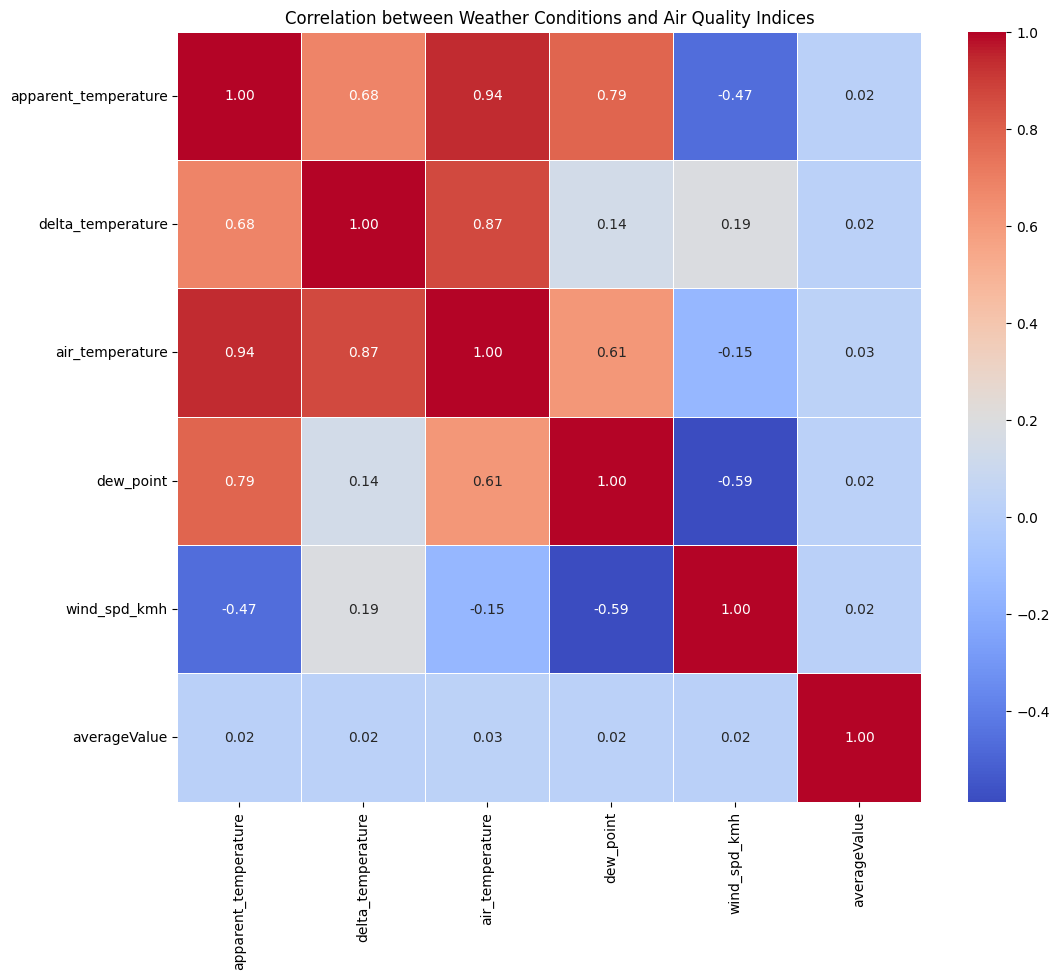

In [15]:
weather_columns = ['apparent_temperature', 'delta_temperature', 'air_temperature', 'dew_point', 'wind_spd_kmh']
air_quality_columns = ['averageValue']

create_heatmap(merged_df, weather_columns, air_quality_columns)

In [3]:
city = "Ballarat"

In [4]:
twitter_data = twitter(es, city=city, size=2000)
epa_data = epa(es, start=3, end=14, city=city, size=2000)

In [5]:
print(twitter_data)

[{'_index': 'twitter_vic', '_id': '6122C277-596B-4BAD-9D25-6A089ED25459', '_score': 3.99325, '_source': {'sentiment': -0.08333333333333333, 'full_name': 'Ballarat', 'language': 'en'}}, {'_index': 'twitter_vic', '_id': '8C7C404B-8545-4BDC-98E0-93DA2313990A', '_score': 3.99325, '_source': {'sentiment': 0.044444444444444446, 'full_name': 'Ballarat', 'language': 'en'}}, {'_index': 'twitter_vic', '_id': 'DFA91138-7954-4921-93D2-A340401F29DB', '_score': 3.99325, '_source': {'sentiment': 0.0425531914893617, 'full_name': 'Ballarat', 'language': 'en'}}, {'_index': 'twitter_vic', '_id': 'C65A48A5-A6B5-4629-ABCE-02550C470CD0', '_score': 3.99325, '_source': {'sentiment': 0, 'full_name': 'Ballarat', 'language': 'en'}}, {'_index': 'twitter_vic', '_id': '8992C511-8F8B-48B8-9C56-72A5244C8683', '_score': 3.99325, '_source': {'sentiment': 0, 'full_name': 'Ballarat', 'language': 'en'}}, {'_index': 'twitter_vic', '_id': '69A7FEB3-3A87-424F-84A6-CAB64AA4DB6B', '_score': 3.99325, '_source': {'sentiment': 0,

In [6]:
data_twitter = [item['_source'] for item in twitter_data]
twitter_df = pd.DataFrame(data_twitter)

data_epa = [{**item['_source'], 'date': item['_index']} for item in epa_data]
epa_df = pd.DataFrame(data_epa)

In [9]:
print(epa_df)

         hour  siteName                coordinates  averageValue  \
0    03:00:00  Ballarat  [-37.5293274, 143.842438]      6.000000   
1    01:00:00  Ballarat  [-37.5293274, 143.842438]      6.940000   
2    02:00:00  Ballarat  [-37.5293274, 143.842438]      7.130000   
3    00:00:00  Ballarat  [-37.5293274, 143.842438]      7.920000   
4    14:00:00  Ballarat  [-37.5293274, 143.842438]      6.430000   
..        ...       ...                        ...           ...   
252  00:00:00  Ballarat  [-37.5293274, 143.842438]      4.900000   
253  02:00:00  Ballarat  [-37.5293274, 143.842438]      2.530438   
254  03:00:00  Ballarat  [-37.5293274, 143.842438]      4.650000   
255  04:00:00  Ballarat  [-37.5293274, 143.842438]      2.505398   
256  05:00:00  Ballarat  [-37.5293274, 143.842438]      4.680000   

    healthParameter healthAdvice                        date  
0         Particles         Good  epa-air-quality-2024-05-13  
1         Particles         Good  epa-air-quality-2024-05

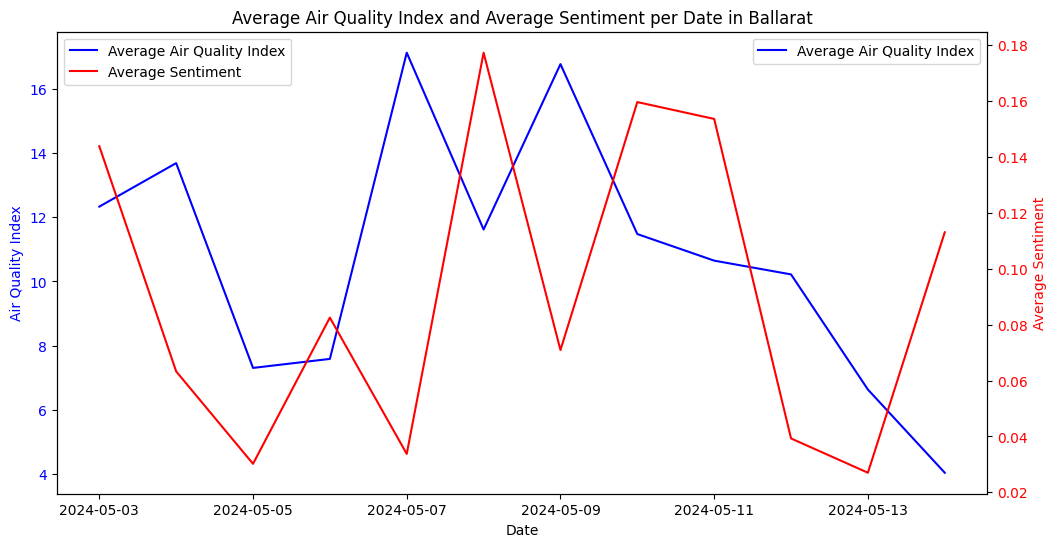

In [8]:
plot_air_quality_and_sentiment(epa_df, twitter_df, city)